In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('mall.csv')

In [ ]:
data.shape

(200, 5)

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
x = data.iloc[:, [3, 4]].values
print(x.shape)

(200, 2)


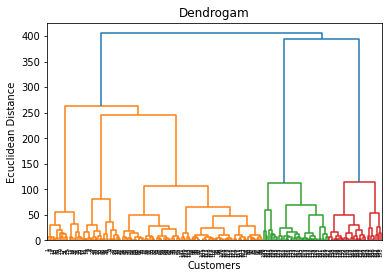

In [ ]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam')
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

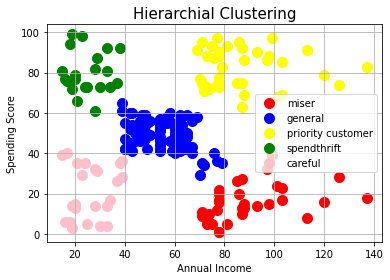

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = 'miser')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'general')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'yellow', label = 'priority customer')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'green', label = 'spendthrift')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'pink', label = 'careful')

plt.title('Hierarchial Clustering', fontsize = 15)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

text analysis and topic modelling

In [ ]:
import pandas as pd
import os

In [ ]:
papers  = pd.read_csv('/content/drive/MyDrive/papers.csv')

In [ ]:
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [ ]:
#Cleaning
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)

# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
75,1995,On Neural Networks with Minimal Weights,Abstract Missing,On Neural Networks with Minimal\nWeights\n\nJ ...
4497,1991,Dynamically-Adaptive Winner-Take-All Networks,Abstract Missing,Dynamically-Adaptive Winner-Take-All Networks\...
1874,2004,Algebraic Set Kernels with Application to Infe...,Abstract Missing,Algebraic Set Kernels with Application to\nInf...
5608,2016,Single Pass PCA of Matrix Products,In this paper we present a new algorithm for c...,Single Pass PCA of Matrix Products\nShanshan W...
1657,2003,Learning with Local and Global Consistency,Abstract Missing,Learning with Local and Global Consistency\nDe...


In [ ]:
import re

# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['paper_text_processed'].head()

75      on neural networks with minimal\nweights\n\nj ...
4497    dynamically-adaptive winner-take-all networks\...
1874    algebraic set kernels with application to\ninf...
5608    single pass pca of matrix products\nshanshan w...
1657    learning with local and global consistency\nde...
Name: paper_text_processed, dtype: object

In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


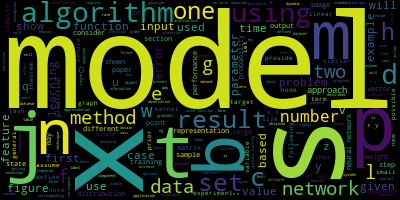

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="black", max_words=1000, contour_width=3, contour_color='yellow')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['neural', 'networks', 'minimal', 'weights', 'ehoshua', 'bruck', 'vasken', 'bohossian', 'california', 'institute', 'technology', 'mail', 'code', 'pasadena', 'ca', 'mail', 'vincent', 'bruck', 'iparadise', 'cal', 'tech', 'abstract', 'linear', 'threshold', 'elements', 'basic', 'building', 'blocks', 'artificial', 'neural']


In [ ]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 5), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 2), (21, 1), (22, 1), (23, 1), (24, 2), (25, 2), (26, 3), (27, 1), (28, 1), (29, 1)]


In [ ]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.006*"learning" + 0.006*"model" + 0.004*"data" + 0.004*"using" + '
  '0.004*"network" + 0.004*"algorithm" + 0.003*"figure" + 0.003*"time" + '
  '0.003*"one" + 0.003*"problem"'),
 (1,
  '0.006*"learning" + 0.005*"model" + 0.005*"data" + 0.005*"set" + '
  '0.004*"function" + 0.004*"time" + 0.004*"using" + 0.003*"one" + '
  '0.003*"linear" + 0.003*"matrix"'),
 (2,
  '0.009*"learning" + 0.005*"model" + 0.004*"set" + 0.004*"algorithm" + '
  '0.004*"network" + 0.004*"matrix" + 0.004*"two" + 0.004*"figure" + '
  '0.004*"data" + 0.004*"function"'),
 (3,
  '0.006*"data" + 0.005*"learning" + 0.005*"time" + 0.005*"using" + '
  '0.005*"algorithm" + 0.005*"model" + 0.003*"set" + 0.003*"function" + '
  '0.003*"models" + 0.003*"given"'),
 (4,
  '0.007*"learning" + 0.006*"model" + 0.005*"function" + 0.005*"data" + '
  '0.005*"using" + 0.004*"time" + 0.004*"set" + 0.004*"network" + '
  '0.004*"algorithm" + 0.003*"used"'),
 (5,
  '0.005*"learning" + 0.005*"model" + 0.004*"data" + 0.004*"two" + 

In [ ]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=c30294a94ee4d82dbfa603427634ddc3a652f767f6ec4e33050656b1a62c6be4
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=be24b9fd99b3cba63eb5fc50d73386d70e7fcd6b4000ff1b7bfbbc1a6ea16426
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


In [ ]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
import os
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './'+ str(num_topics) +'.html')

LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.009533 -0.009984       1        1  13.090948
8      0.008906  0.000108       2        1  13.079885
3      0.000942  0.006623       3        1  12.508746
7      0.000073  0.001027       4        1  11.861353
4     -0.008689  0.006782       5        1  11.743679
2     -0.001264  0.007256       6        1  10.942385
1      0.001120 -0.000174       7        1   8.822784
9     -0.002689 -0.003778       8        1   7.882327
5      0.006168 -0.004385       9        1   5.650024
0      0.004966 -0.003476      10        1   4.417870, topic_info=         Term         Freq        Total Category  logprob  loglift
326     model  1213.000000  1213.000000  Default  30.0000  30.0000
283  learning  1306.000000  1306.000000  Default  29.0000  29.0000
339   network   691.000000   691.000000  Default  28.0000  28.0000
248     input   373.000000   373.000000  Default  27.0000  27.0000
530       two   722.000000   722.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
206     given    21.867698   501.171539  Topic10  -6.0869  -0.0124
353    number    23.907702   624.387389  Topic10  -5.9977  -0.1431
192  function    27.909601   917.994355  Topic10  -5.8430  -0.3737
24       also    21.891786   544.257744  Topic10  -6.0858  -0.0938
181     first    20.045123   441.031081  Topic10  -6.1739   0.0284

[853 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
7481       1  0.073995  aalen
7481       2  0.073995  aalen
7481       3  0.110993  aalen
7481       4  0.332979  aalen
7481       5  0.110993  aalen
...      ...       ...    ...
11473      6  0.025428    zti
11473      7  0.127139    zti
11473      8  0.050856    zti
11473      9  0.050856    zti
11473     10  0.050856    zti

[3788 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 9, 4, 8, 5, 3, 2, 10, 6, 1])